# Handling Imbalances in the Dataset

In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('/Users/CRYPTO/Infosys Internship - Hate Speech Detection/Tokenization & Encoding/Reddit_Encoded.csv')
print(df.head())

                                             comment  hate_speech  \
0  subsection retarded hungarians ohh boy brace l...            1   
1  hiii just got work Foundation and grounding ma...            0   
2                    wow guess soyboys every country            0   
3  owen benjamins soyboy song goes every country ...            0   
4   yall hear sumn means live small town rn for w...            0   

                                  lemmatized_comment  \
0  subsection retard hungarians ohh boy brace liv...   
1  hiii just get work Foundation and ground mainl...   
2                    wow guess soyboys every country   
3  owen benjamins soyboy song go every country amaze   
4  yall hear sumn mean live small town rn for wor...   

                                document_vector_flat  
0  0.014043219,-0.01809359,0.017145459,0.08062436...  
1  -0.0030388932,-0.035133556,0.020659983,0.07383...  
2  0.017362628,0.005587179,0.0297773,0.109146975,...  
3  0.018085241,0.0011954829,

## Checking Class Distribution

In [3]:
class_distribution = df['hate_speech'].value_counts()

print("Class Distribution:")
print(class_distribution)

Class Distribution:
0    16925
1     5286
Name: hate_speech, dtype: int64


## Visualizing Class Distribution

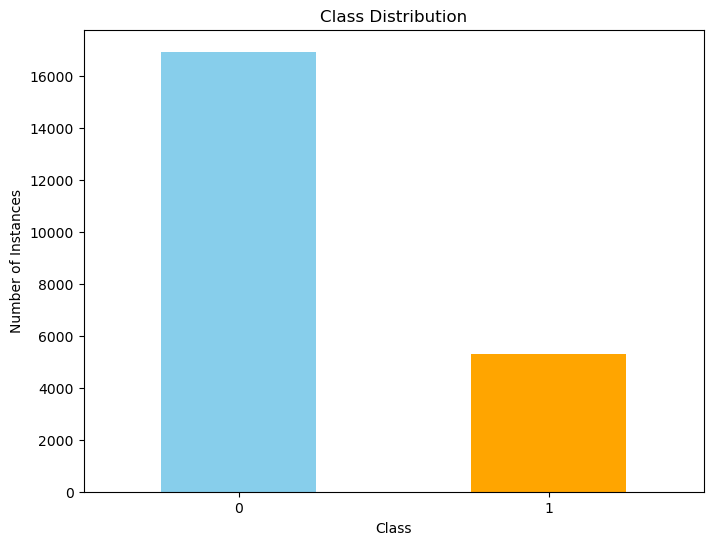

In [4]:
import matplotlib.pyplot as plt

# Plotting class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.show()

## Convert the document vectors from their string representation back into numerical form

In [5]:
df['document_vector'] = df['document_vector_flat'].apply(lambda x: np.fromstring(x, sep=','))
print(df['document_vector'].head())

0    [0.014043219, -0.01809359, 0.017145459, 0.0806...
1    [-0.0030388932, -0.035133556, 0.020659983, 0.0...
2    [0.017362628, 0.005587179, 0.0297773, 0.109146...
3    [0.018085241, 0.0011954829, 2.8959475e-05, 0.0...
4    [0.023993038, -0.00060867134, 0.005239945, 0.0...
Name: document_vector, dtype: object


## Split data for training and testing

In [6]:
X = np.stack(df['document_vector'].values)
y = df['hate_speech']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

### Training without handling imbalance

In [7]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

In [8]:
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [9]:
#Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.82
Precision: 0.83
Recall: 0.34
F1-Score: 0.48


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      3369
           1       0.83      0.34      0.48      1074

    accuracy                           0.82      4443
   macro avg       0.83      0.66      0.69      4443
weighted avg       0.82      0.82      0.79      4443



### Applying SMOTE to handle imbalance

In [11]:
# Applying SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Retrain the model after handling imbalances

In [12]:
# Retrain the model
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test)

In [13]:
# Reevaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.80
Precision: 0.57
Recall: 0.73
F1-Score: 0.64


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.86      3369
           1       0.57      0.73      0.64      1074

    accuracy                           0.80      4443
   macro avg       0.74      0.78      0.75      4443
weighted avg       0.83      0.80      0.81      4443



## Random Forest Classifier

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [17]:
# Train the classifier
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [17]:
#Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.82
Precision: 0.86
Recall: 0.29
F1-Score: 0.43


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      3369
           1       0.86      0.29      0.43      1074

    accuracy                           0.82      4443
   macro avg       0.83      0.64      0.66      4443
weighted avg       0.82      0.82      0.78      4443



### Using SMOTE sampled training data

In [19]:
# Retrain the model
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test)

In [20]:
#Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.81
Precision: 0.64
Recall: 0.50
F1-Score: 0.56


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3369
           1       0.64      0.50      0.56      1074

    accuracy                           0.81      4443
   macro avg       0.74      0.70      0.72      4443
weighted avg       0.80      0.81      0.80      4443

